In [1]:
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xlrd

import matplotlib.pyplot as plt
import csv
import matplotlib.pyplot as plt 
#from nolearn.dbn import DBN
#import timei

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
kdd_data=pd.read_csv('C:/Users/srish/Downloads/Compressed/kddcup.data_10_percent_corrected.csv',header=None)
kdd_data.transpose()
#kdd_data1=pd.read_csv('C:/Users/srish/Downloads/Compressed/kddcup.data_10_percent_corrected.csv',header=None)
#kdd_data2=pd.read_csv('C:/Users/srish/Downloads/Compressed/kddcup.data_10_percent_corrected.csv',header=None)

,0,1,2,3,4,5,6,7,8,9,...,494011,494012,494013,494014,494015,494016,494017,494018,494019,494020
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
2,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
3,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
4,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
5,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
kdd_header=pd.read_csv('Field Names.csv',header=None)
kdd_header
col_name=kdd_header.iloc[:,0:1]
#kdd_data.columns=col_name[0:]
col_name

,0
0,duration
1,protocol_type
2,service
3,flag
4,src_bytes
5,dst_bytes
6,land
7,wrong_fragment
8,urgent
9,hot


In [44]:
kdd_header.drop(kdd_header.columns[1],axis=1,inplace=True)

In [45]:
kdd_header.append(['type'])
kdd_header

,0
0,duration
1,protocol_type
2,service
3,flag
4,src_bytes
5,dst_bytes
6,land
7,wrong_fragment
8,urgent
9,hot


In [46]:
kdd_data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [47]:
res=kdd_data.duplicated(subset=None,keep='first')
print(res.equals(True))

False


In [48]:
def num_missing(x): 
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(kdd_data.apply(num_missing, axis=0)) #

Missing values per column:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64


In [49]:
print("Total rows ",len(kdd_data))

Total rows  494021


In [50]:
kdd_data[41].value_counts() # types of attacks

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: 41, dtype: int64

In [51]:
cols=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
                     'hot','num_failed_logins','logged_in','lnum_compromised','lroot_shell','lsu_attempted','lnum_root','lnum_file_creations',
                     'lnum_shells','lnum_access_files','lnum_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                     'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
                     'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label']
kdd_data.columns=cols
kdd_data.loc[kdd_data.label!="normal.","label"]="attack"

In [52]:
kdd_data.label.value_counts()

attack     396743
normal.     97278
Name: label, dtype: int64

In [53]:
kdd_data.loc[kdd_data.label!="normal.","label"]=1
kdd_data.loc[kdd_data.label=="normal.","label"]=0
print(kdd_data.label.value_counts())

1    396743
0     97278
Name: label, dtype: int64


In [54]:
cleanup_nums = {"protocol_type":     {"tcp": 1, "icmp": 2, "udp": 3},
                "service": {"vmnet": 1, "smtp": 2, "ntp_u":3, "shell":4, "kshell":5, "aol":6, "imap4":7, "urh_i":8, "netbios_ssn":9,
                           "tftp_u":10, "mtp":11, "uucp":12, "nnsp":13, "echo":14, "tim_i":15, "ssh":16, "iso_tsap":17, "time":18,
                           "netbios_ns":19,"systat":20, "hostnames":21, "login":22, "efs":23, "supdup":24, "http_8001":25, "courier":26,
                           "ctf":27,"finger":28,"nntp":29,"ftp_data":30,"red_i":31,"ldap":32,"http":33,"ftp":34,"pm_dump":35,"exec":36,
                           "klogin":37,"auth":38,"netbios_dgm":39,"other":40,"link":41,"X11":42,"discard":43,"private":44,"remote_job":45,
                           "IRC":46,"daytime":47,"pop_3":48,"pop_2":49,"gopher":50,"sunrpc":51,"name":52,"rje":53,"domain":54,"uucp_path":55,
                           "http_2784":56,"Z39_50":57,"domain_u":58,"csnet_ns":59,"whois":60,"eco_i":61,"bgp":62,"sql_net":63,"printer":64,
                           "telnet":65,"ecr_i":66,"urp_i":67,"netstat":68,"http_443":69,"harvest":70},
               "flag":{"RSTR":1,"S3":2,"SF":3,"RSTO":4,"SH":5,"OTH":6,"S2":7,"RSTOS0":8,"S1":9,"S0":10,"REJ":11}}
#Replacing the encoded data in the dataset
kdd_data.replace(cleanup_nums, inplace=True)
kdd_data.head()
kdd_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,494011,494012,494013,494014,494015,494016,494017,494018,494019,494020
duration,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
protocol_type,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
service,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,...,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00
flag,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
src_bytes,181.00,239.00,235.00,219.00,217.00,217.00,212.00,159.00,210.00,212.00,...,308.00,291.00,289.00,306.00,289.00,310.00,282.00,203.00,291.00,219.00
dst_bytes,5450.00,486.00,1337.00,1337.00,2032.00,2032.00,1940.00,4087.00,151.00,786.00,...,662.00,1862.00,244.00,662.00,1862.00,1881.00,2286.00,1200.00,1200.00,1234.00
land,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [55]:
kdd_data[['label']] = kdd_data[['label']].apply(pd.to_numeric)
kdd_data.label.value_counts()

1    396743
0     97278
Name: label, dtype: int64

In [56]:
array=kdd_data.values
x=array[:,0:41]
y=array[:,41]

In [57]:
#Cross validation
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    ## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

In [58]:
models=[]
scores=[]

------------------------------------------
Accuracy =  99.97570964934181  %
[[ 29180     12]
 [    24 118991]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     29192
        1.0       1.00      1.00      1.00    119015

avg / total       1.00      1.00      1.00    148207



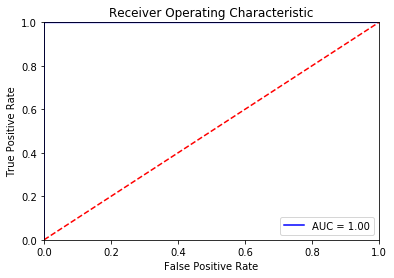

In [59]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)

report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("Random Forest Classifier")
scores.append(acc*100)

In [60]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
important_ftrs=model.feature_importances_
# display the relative importance of each attribute
print((important_ftrs))

[4.72800174e-04 3.84124341e-02 7.23315685e-02 5.57880133e-02
 8.35605880e-03 1.57950460e-03 1.30876714e-05 8.09487754e-03
 1.52708904e-05 1.20270899e-02 1.61596002e-04 8.06528502e-02
 6.46718663e-03 9.24293670e-05 1.28257526e-05 7.15247662e-05
 4.81380651e-05 2.46273350e-05 2.98416653e-05 0.00000000e+00
 0.00000000e+00 9.36039432e-04 1.01373454e-01 1.00194818e-01
 5.66717538e-04 7.33572960e-04 1.97906169e-02 2.30882746e-02
 9.45751088e-02 1.52501280e-03 3.07117629e-03 8.86934772e-02
 6.34404308e-02 1.50654032e-02 5.00706643e-03 8.03057278e-02
 6.01004729e-03 5.08312641e-02 4.59887435e-02 1.25137324e-02
 1.63759143e-03]


In [61]:
label_index=kdd_data.columns
print(label_index)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')


In [62]:
to_be_removed=[]

for i in range(0,len(important_ftrs)-1):
    if 100*important_ftrs[i]<1 :
        to_be_removed.append(label_index[i])

print("Number of attributes to be removed",len(to_be_removed))
print("They are \n ",to_be_removed)

Number of attributes to be removed 23
They are 
  ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'lnum_compromised', 'lroot_shell', 'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells', 'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login', 'is_guest_login', 'serror_rate', 'srv_serror_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate']


In [74]:
kdd_data_modified=kdd_data
#for i in range(0,len(to_be_removed)):
 #   print(to_be_removed[i]," Dropped ")      
  #  kdd_data_modified.drop(to_be_removed[i],axis=1,inplace=True)
    
kdd_data_modified

,protocol_type,service,flag,hot,logged_in,count,srv_count,rerror_rate,srv_rerror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,1,33,3,0,1,8,8,0.0,0.00,1.0,9,9,1.0,0.11,0.00,0.00,0.00,0.0,0
1,1,33,3,0,1,8,8,0.0,0.00,1.0,19,19,1.0,0.05,0.00,0.00,0.00,0.0,0
2,1,33,3,0,1,8,8,0.0,0.00,1.0,29,29,1.0,0.03,0.00,0.00,0.00,0.0,0
3,1,33,3,0,1,6,6,0.0,0.00,1.0,39,39,1.0,0.03,0.00,0.00,0.00,0.0,0
4,1,33,3,0,1,6,6,0.0,0.00,1.0,49,49,1.0,0.02,0.00,0.00,0.00,0.0,0
5,1,33,3,0,1,6,6,0.0,0.00,1.0,59,59,1.0,0.02,0.00,0.00,0.00,0.0,0
6,1,33,3,0,1,1,2,0.0,0.00,1.0,1,69,1.0,1.00,0.00,0.00,0.00,0.0,0
7,1,33,3,0,1,5,5,0.0,0.00,1.0,11,79,1.0,0.09,0.00,0.00,0.00,0.0,0
8,1,33,3,0,1,8,8,0.0,0.00,1.0,8,89,1.0,0.12,0.00,0.00,0.00,0.0,0
9,1,33,3,1,1,8,8,0.0,0.00,1.0,8,99,1.0,0.12,0.00,0.00,0.00,0.0,0


In [76]:
array=kdd_data.values
x=array[:,0:19]
y=array[:,18]

In [77]:
#Cross validation
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    ## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

In [78]:
models=[]
scores=[]

------------------------------------------
Accuracy =  100.0  %
[[ 29192      0]
 [     0 119015]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     29192
        1.0       1.00      1.00      1.00    119015

avg / total       1.00      1.00      1.00    148207



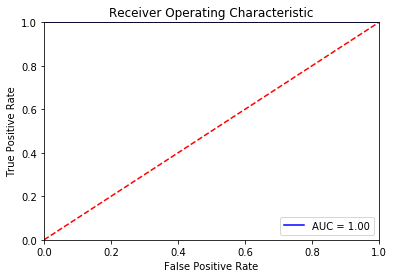

In [79]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)

report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("Random Forest Classifier")
scores.append(acc*100)